In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Supress FuturWarnings until Kaggle updates to Seaborn 0.13.0
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [182]:
# Read the data from csv file
concrete_data = pd.read_csv("/Users/39324/Desktop/ML_project/Dataset.csv")

# Rename 'blast_furnace_slag' & 'concrete_compressive_strength' for easier reading and referencing
concrete_data = concrete_data.rename(columns = {'blast_furnace_slag': 'slag', 'concrete_compressive_strength': 'strength'})
concrete_data.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
print('Total number of nan values: ', concrete_data.isna().sum().sum())


Total number of nan values:  0


In [5]:
concrete_data.head()


,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete_data.describe()


,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


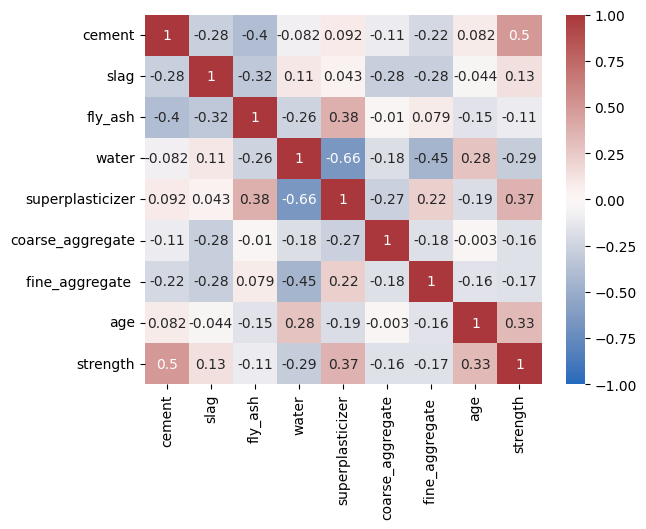

In [7]:
matrix = concrete_data.iloc[:, 0:9].corr(
    method = 'pearson',
)

# Plot correlation matrix & color by coefficient values
sns.heatmap(matrix, annot=True,
           vmax = 1,
           vmin = -1,
           center = 0,
           cmap = 'vlag');

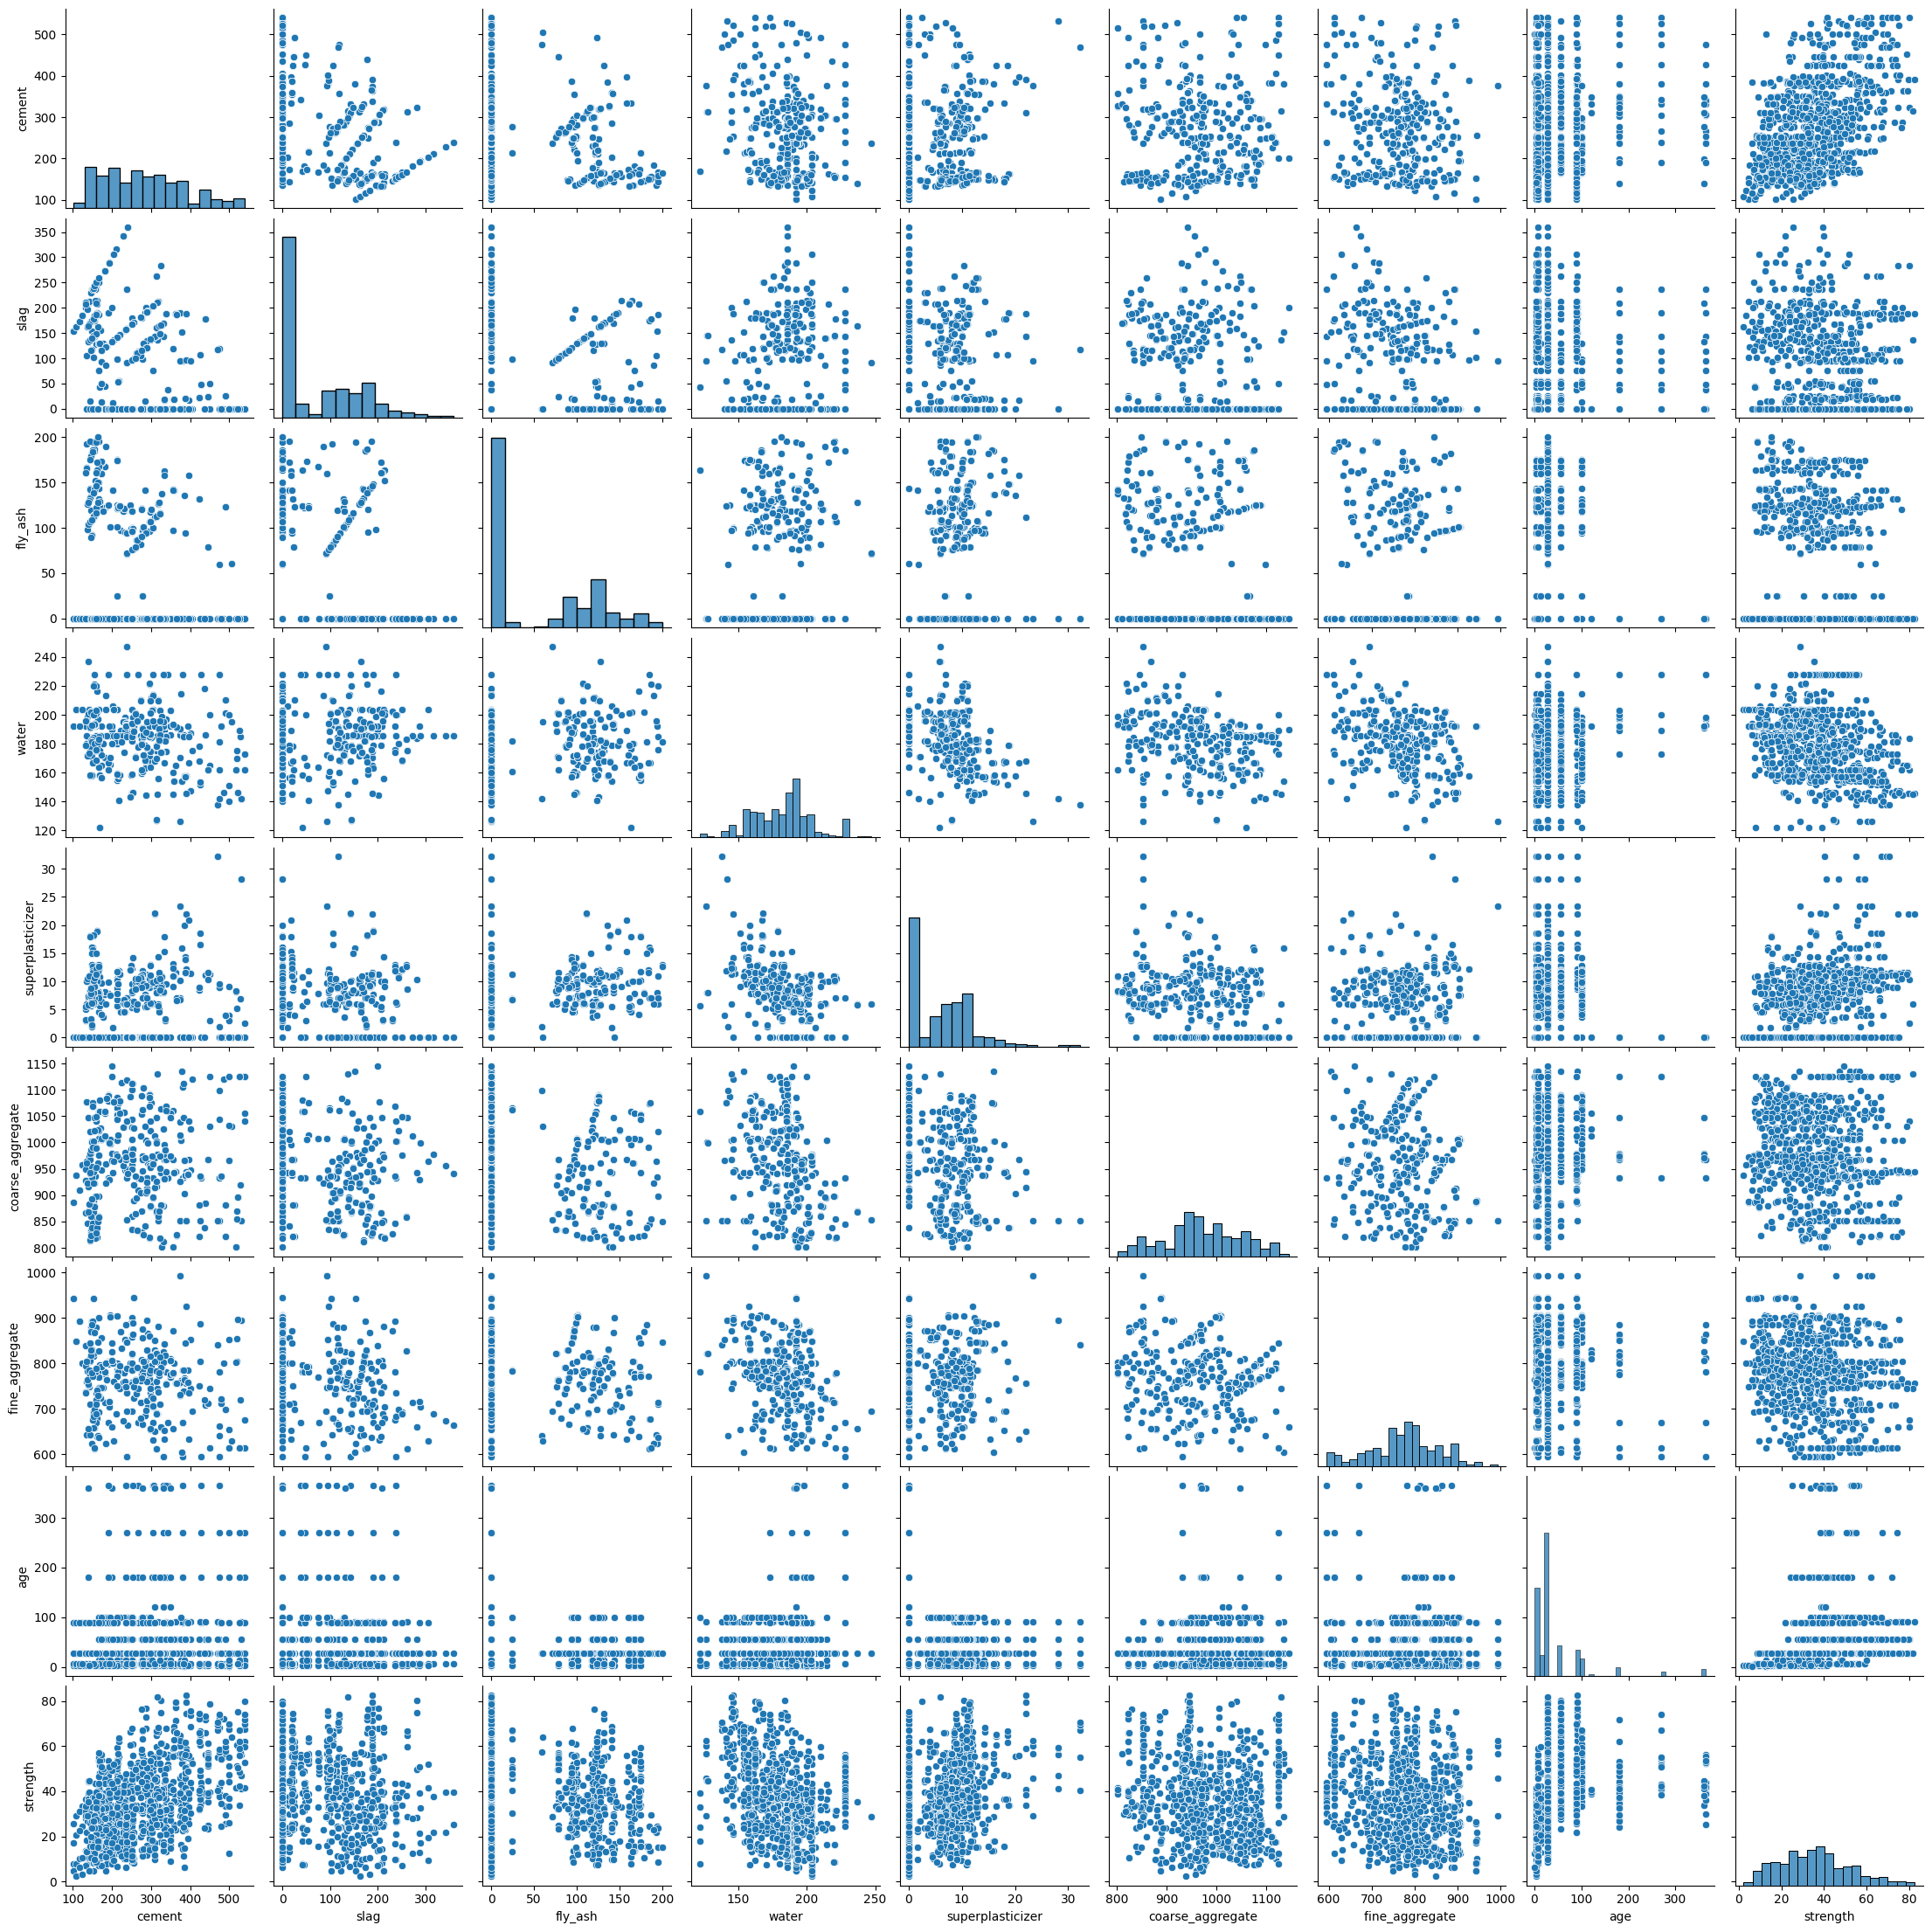

In [8]:
sns.pairplot(concrete_data.iloc[:, 0:9]);


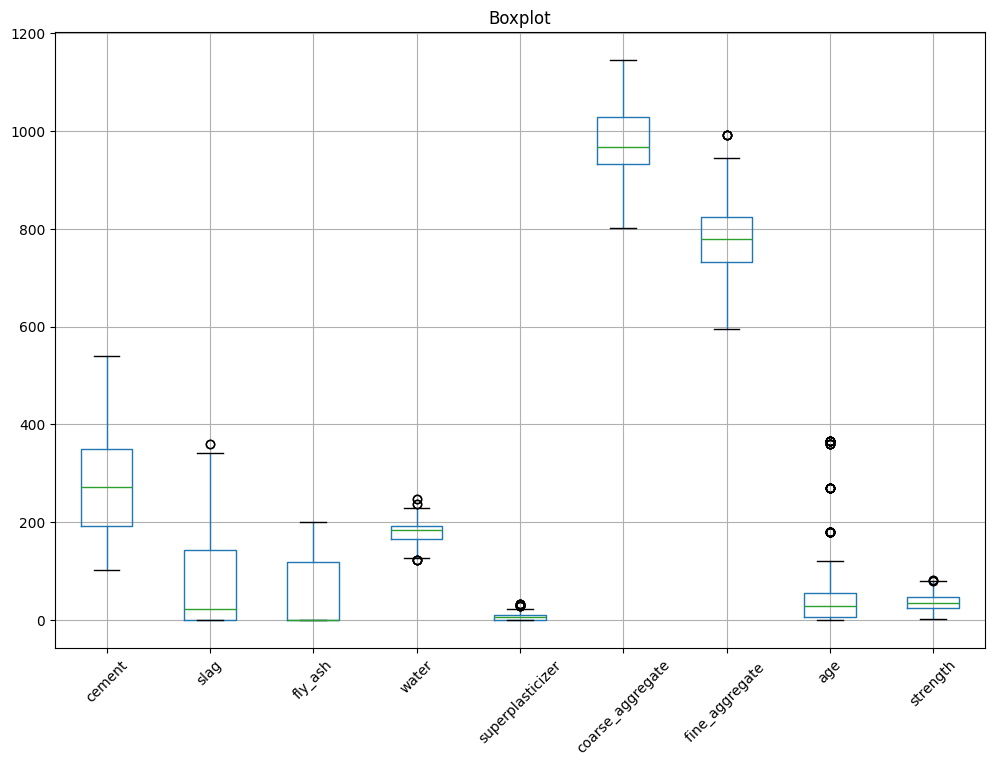

In [5]:
concrete_data.boxplot(figsize=(12, 8), rot=45)
plt.title('Boxplot')
plt.show()

In [9]:

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


X = concrete_data.drop(columns=['strength'])
y = concrete_data['strength']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data using MinMaxScaler

scaler = MinMaxScaler()
scaler_y= MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train= scaler_y.fit_transform(y_train_reshaped)
y_test=scaler_y.transform(y_test_reshaped)

# Convert the scaled data back to DataFrame for plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Visualizza il box plot per X_train_scaled


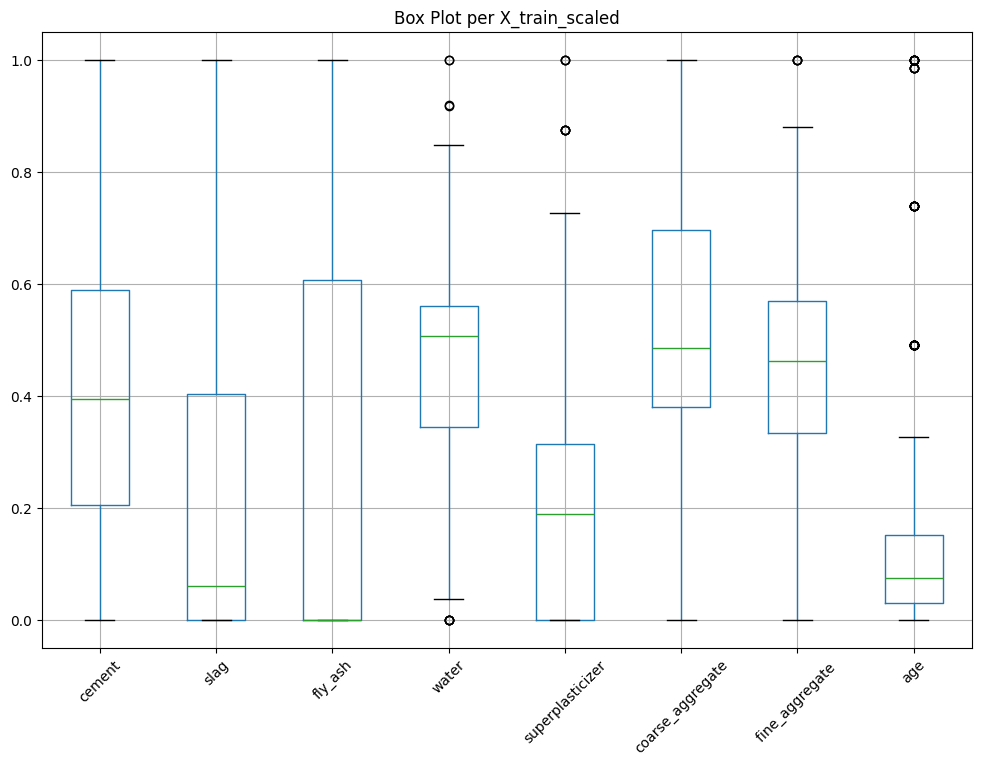

In [92]:
X_train_scaled_df.boxplot(figsize=(12, 8), rot=45)
plt.title('Box Plot per X_train_scaled')
plt.show()


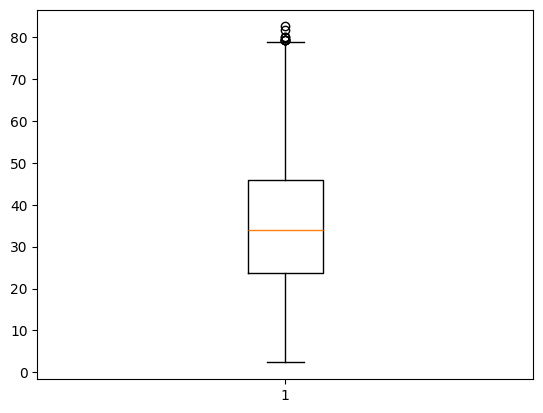

In [75]:
plt.boxplot(y_train)
plt.show()

# Multi Linear Regression

In [10]:
multi_model = LinearRegression()
multi_model = LinearRegression(fit_intercept = True).fit(X_train_scaled,y_train)
r_squared = round(multi_model.score(X_train_scaled,y_train),2)
print('r_squared:', r_squared)


NameError: name 'LinearRegression' is not defined

# GPR

## K1

C:\Users\39324\AppData\Local\Temp\ipykernel_8140\1356763680.py:43: RuntimeWarning: divide by zero encountered in divide
  mape_train_RBF = np.mean(np.abs((y_train - y_pred_train_K1) / y_train)) * 100


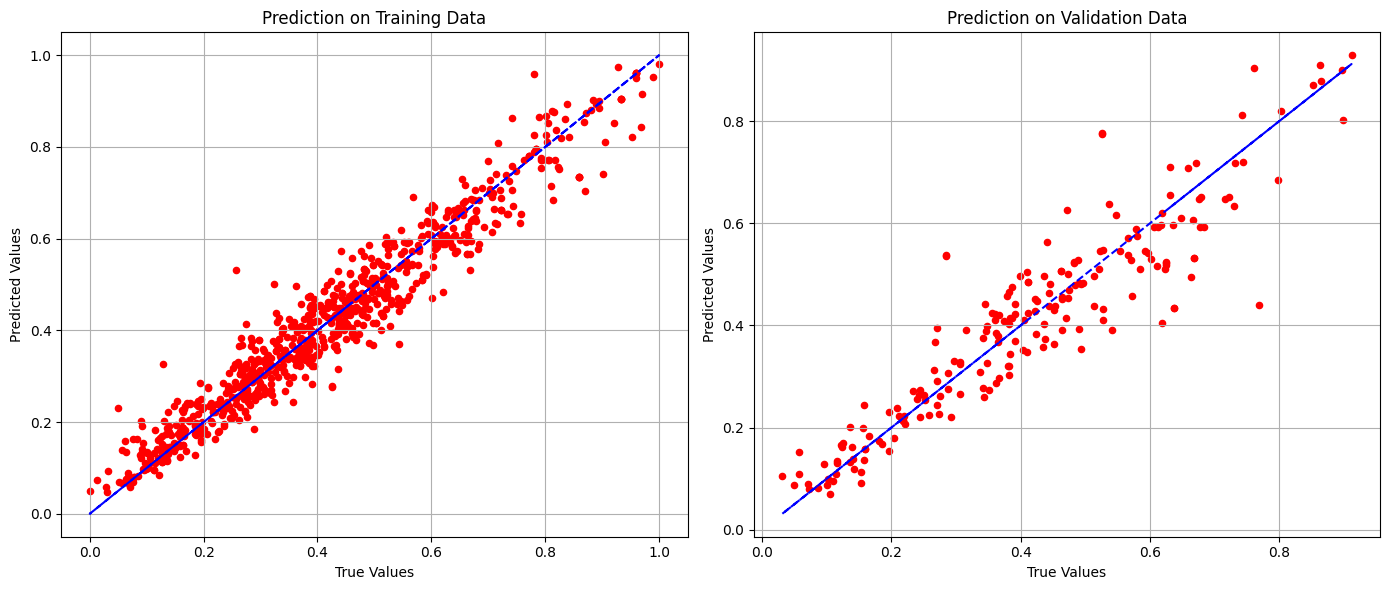

RMSE - Training data: 0.05
RMSE - validation data: 0.08
MAPE - Training data: inf%
MAPE - validation data: 89.35%
R^2 - Training data: 0.94
R^2 - validation data: 0.86


In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error




log_marginal_likelihoods=[]
sigma_fs = [0.01,1.0,5,10]  # Variance parameter for RBF
length_scales = [ 0.01, 1.0, 10]  # Length scale parameter for RBF
sigma_ns = np.std(y_train)/(np.sqrt(2)) # Variance parameter for noise
best_log_likelihood = -np.inf

for length_scale in length_scales:
    for sigma_f in sigma_fs:
        kernel = sigma_f**2 * RBF(length_scale=length_scale) + sigma_ns**2 * WhiteKernel(noise_level=1)
        gpr_1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=1e-12, normalize_y=True)
        gpr_1.fit(X_train_scaled, y_train)
        log_marginal_likelihood = gpr_1.log_marginal_likelihood()
        log_marginal_likelihoods.append(log_marginal_likelihood)

        if log_marginal_likelihood > best_log_likelihood:
            best_log_likelihood = log_marginal_likelihood
            best_params = {'length_scale': length_scale,'sigma_n': sigma_f}
        

best_length_scale = best_params['length_scale']
best_sigma_n = best_params['sigma_n']

kernel_ottimo= sigma_f**2 * RBF(length_scale=length_scale) + best_sigma_n**2 * WhiteKernel(noise_level=1)
gpr_1 = GaussianProcessRegressor(kernel=kernel_ottimo, n_restarts_optimizer=30, alpha=1e-12, normalize_y=True)
gpr_1.fit(X_train_scaled, y_train)

y_pred_train_K1, sigma_train_1 = gpr_1.predict(X_train_scaled, return_std=True)
y_pred_1, sigma_1 = gpr_1.predict(X_test_scaled, return_std=True)

# Calcolo degli indicatori di performance
rmse_train_RBF = np.sqrt(mean_squared_error(y_train, y_pred_train_K1))
rmse_test_RBF = np.sqrt(mean_squared_error(y_test, y_pred_1))

mape_train_RBF = np.mean(np.abs((y_train - y_pred_train_K1) / y_train)) * 100
mape_test_RBF = np.mean(np.abs((y_test - y_pred_1) / y_test)) * 100

r2_train_RBF = r2_score(y_train, y_pred_train_K1)
r2_test_RBF = r2_score(y_test, y_pred_1)

# Plot dei risultati
plt.figure(figsize=(14, 6))

# Plot sui dati di addestramento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_K1, c='r', s=20, label='Error on training data')
plt.plot(y_train, y_train, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Training Data')
plt.grid(True)

# Plot sui dati di test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_1, c='r', s=20, label='Error on test data')
plt.plot(y_test, y_test, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Validation Data')
plt.grid(True)

plt.tight_layout()
plt.show()

# Stampa degli indicatori di performance
print(f"RMSE - Training data: {rmse_train_RBF:.2f}")
print(f"RMSE - validation data: {rmse_test_RBF:.2f}")
print(f"MAPE - Training data: {mape_train_RBF:.2f}%")
print(f"MAPE - validation data: {mape_test_RBF:.2f}%")
print(f"R^2 - Training data: {r2_train_RBF:.2f}")
print(f"R^2 - validation data: {r2_test_RBF:.2f}")


## RBF

C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\lo

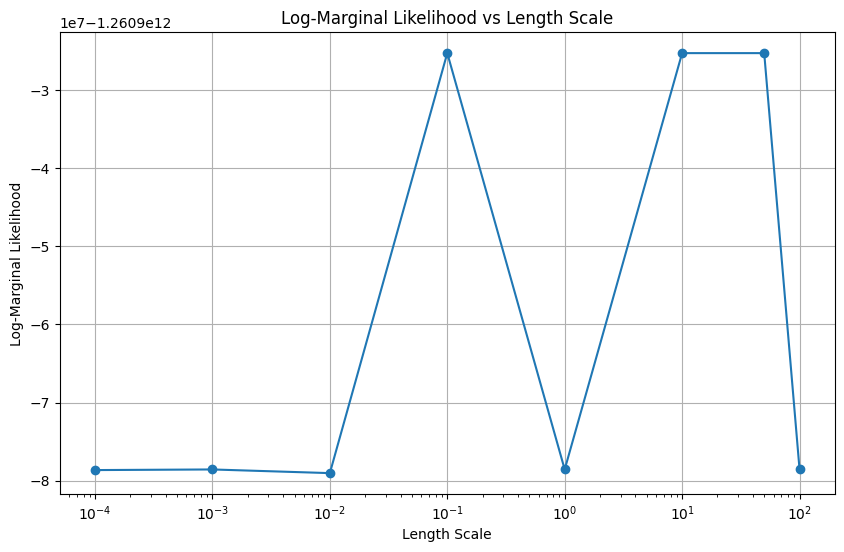

C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\39324\AppData\Local\Temp\ipykernel_8140\2545657763.py:47: RuntimeWarning: divide by zero encountered in divide
  mape_train_RBF = np.mean(np.abs((y_train - y_pred_train_RBF) / y_train)) * 100
C:\Users\39324\AppData\Local\Temp\ipykernel_8140\2545657763.py:47: RuntimeWarning: invalid value encountered in divide
  mape_train_RBF = np.mean(np.abs((y_train - y_pred_train_RBF) / y_train)) * 100


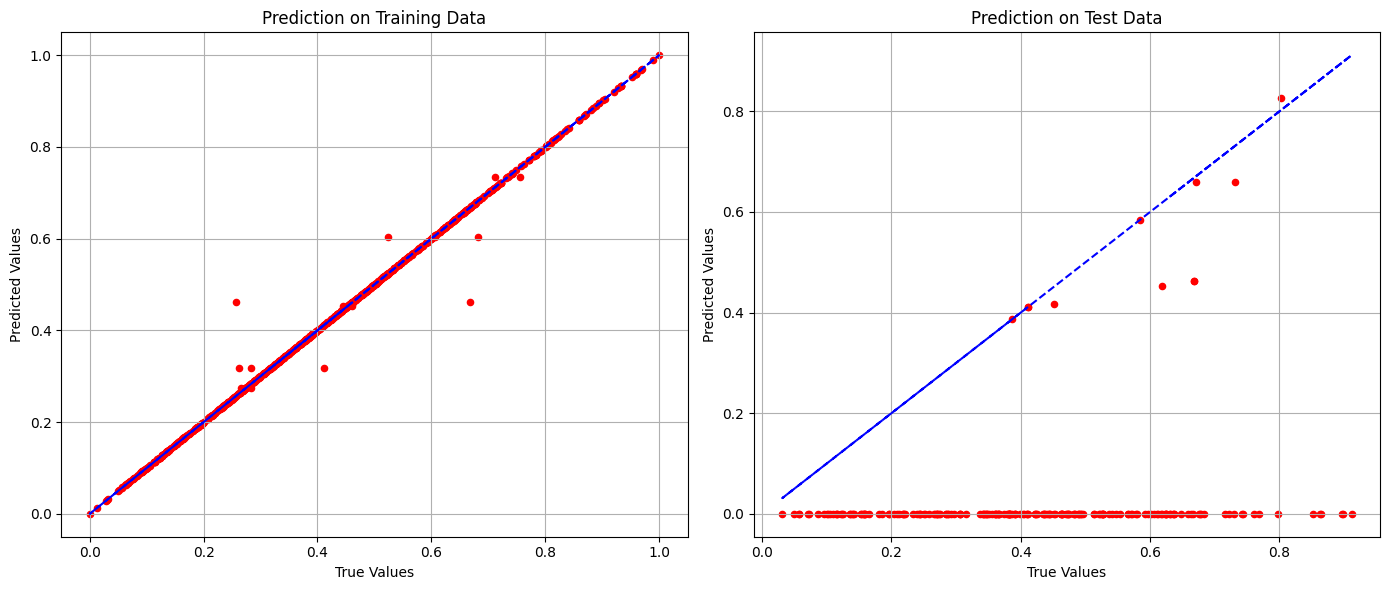

RMSE - Training data: 0.01
RMSE - Test data: 0.44
MAPE - Training data: nan%
MAPE - Test data: 100.19%
R^2 - Training data: 1.00
R^2 - Test data: -3.85


In [15]:
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


length_scales = [0.0001,0.001, 0.01, 0.1, 1, 10, 50, 100]
log_marginal_likelihoods = []


# Calcoliamo la log-marginal likelihood per ciascun valore di length_scale
for length_scale in length_scales:
    kernel_RBF = RBF(length_scale=length_scale)
    gpr_gaussian = GaussianProcessRegressor(kernel=kernel_RBF, n_restarts_optimizer=30, alpha=1e-12, normalize_y=True)
    gpr_gaussian.fit(X_train_scaled, y_train)
    log_marginal_likelihood = gpr_gaussian.log_marginal_likelihood()
    log_marginal_likelihoods.append(log_marginal_likelihood)

# Troviamo il miglior length_scale
best_length_scale = length_scales[np.argmax(log_marginal_likelihoods)]

# Plot della log-marginal likelihood
plt.figure(figsize=(10, 6))
plt.plot(length_scales, log_marginal_likelihoods, marker='o')
plt.xscale('log')
plt.xlabel('Length Scale')
plt.ylabel('Log-Marginal Likelihood')
plt.title('Log-Marginal Likelihood vs Length Scale')
plt.grid(True)
plt.show()

# Utilizziamo il miglior length_scale trovato
kernel_RBF_migliore = RBF(length_scale=best_length_scale)
gpr_gaussian = GaussianProcessRegressor(kernel=kernel_RBF_migliore)

# Addestramento e previsioni
gpr_gaussian.fit(X_train_scaled, y_train)
y_pred_train_RBF, sigma_train_RBF = gpr_gaussian.predict(X_train_scaled, return_std=True)
y_pred_RBF, sigma_RBF = gpr_gaussian.predict(X_test_scaled, return_std=True)

# Calcolo degli indicatori di performance
rmse_train_RBF = np.sqrt(mean_squared_error(y_train, y_pred_train_RBF))
rmse_test_RBF = np.sqrt(mean_squared_error(y_test, y_pred_RBF))

mape_train_RBF = np.mean(np.abs((y_train - y_pred_train_RBF) / y_train)) * 100
mape_test_RBF = np.mean(np.abs((y_test - y_pred_RBF) / y_test)) * 100

r2_train_RBF = r2_score(y_train, y_pred_train_RBF)
r2_test_RBF = r2_score(y_test, y_pred_RBF)

# Plot dei risultati
plt.figure(figsize=(14, 6))

# Plot sui dati di addestramento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_RBF, c='r', s=20, label='Error on training data')
plt.plot(y_train, y_train, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Training Data')
plt.grid(True)

# Plot sui dati di test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_RBF, c='r', s=20, label='Error on test data')
plt.plot(y_test, y_test, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()

# Stampa degli indicatori di performance
print(f"RMSE - Training data: {rmse_train_RBF:.2f}")
print(f"RMSE - Test data: {rmse_test_RBF:.2f}")
print(f"MAPE - Training data: {mape_train_RBF:.2f}%")
print(f"MAPE - Test data: {mape_test_RBF:.2f}%")
print(f"R^2 - Training data: {r2_train_RBF:.2f}")
print(f"R^2 - Test data: {r2_test_RBF:.2f}")

## Matern

C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\lo

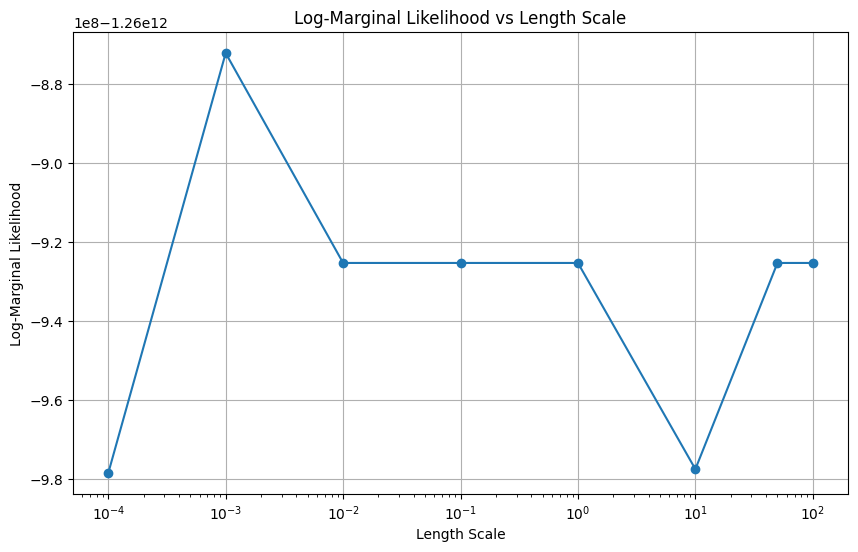

C:\Users\39324\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\39324\AppData\Local\Temp\ipykernel_8140\1104932013.py:47: RuntimeWarning: divide by zero encountered in divide
  mape_train_RBF = np.mean(np.abs((y_train - y_pred_train_RBF) / y_train)) * 100


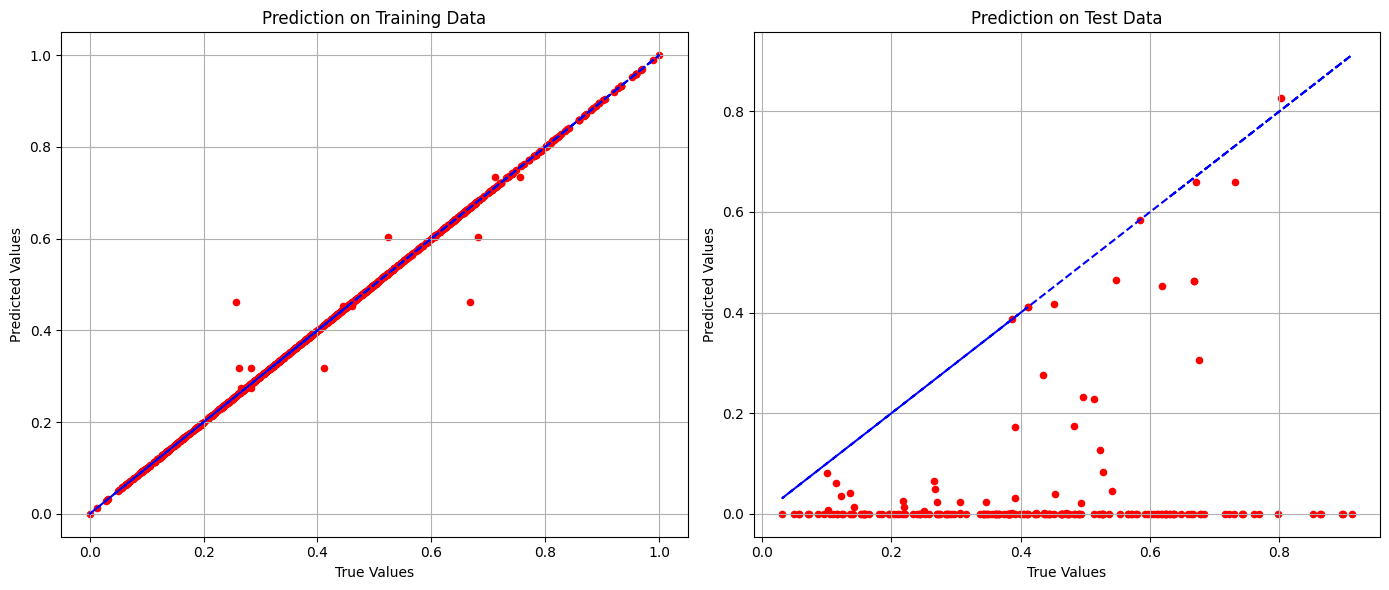

RMSE - Training data: 0.01
RMSE - Test data: 0.43
MAPE - Training data: inf%
MAPE - Test data: 97.59%
R^2 - Training data: 1.00
R^2 - Test data: -3.62


In [16]:
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, WhiteKernel,Matern
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


length_scales = [0.0001,0.001, 0.01, 0.1, 1, 10, 50, 100]
log_marginal_likelihoods = []


# Calcoliamo la log-marginal likelihood per ciascun valore di length_scale
for length_scale in length_scales:
    kernel_RBF = Matern(length_scale=length_scale)
    gpr_gaussian = GaussianProcessRegressor(kernel=kernel_RBF, n_restarts_optimizer=30, alpha=1e-12, normalize_y=True)
    gpr_gaussian.fit(X_train_scaled, y_train)
    log_marginal_likelihood = gpr_gaussian.log_marginal_likelihood()
    log_marginal_likelihoods.append(log_marginal_likelihood)

# Troviamo il miglior length_scale
best_length_scale = length_scales[np.argmax(log_marginal_likelihoods)]

# Plot della log-marginal likelihood
plt.figure(figsize=(10, 6))
plt.plot(length_scales, log_marginal_likelihoods, marker='o')
plt.xscale('log')
plt.xlabel('Length Scale')
plt.ylabel('Log-Marginal Likelihood')
plt.title('Log-Marginal Likelihood vs Length Scale')
plt.grid(True)
plt.show()

# Utilizziamo il miglior length_scale trovato
kernel_RBF_migliore = RBF(length_scale=best_length_scale)
gpr_gaussian = GaussianProcessRegressor(kernel=kernel_RBF_migliore)

# Addestramento e previsioni
gpr_gaussian.fit(X_train_scaled, y_train)
y_pred_train_RBF, sigma_train_RBF = gpr_gaussian.predict(X_train_scaled, return_std=True)
y_pred_RBF, sigma_RBF = gpr_gaussian.predict(X_test_scaled, return_std=True)

# Calcolo degli indicatori di performance
rmse_train_RBF = np.sqrt(mean_squared_error(y_train, y_pred_train_RBF))
rmse_test_RBF = np.sqrt(mean_squared_error(y_test, y_pred_RBF))

mape_train_RBF = np.mean(np.abs((y_train - y_pred_train_RBF) / y_train)) * 100
mape_test_RBF = np.mean(np.abs((y_test - y_pred_RBF) / y_test)) * 100

r2_train_RBF = r2_score(y_train, y_pred_train_RBF)
r2_test_RBF = r2_score(y_test, y_pred_RBF)

# Plot dei risultati
plt.figure(figsize=(14, 6))

# Plot sui dati di addestramento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_RBF, c='r', s=20, label='Error on training data')
plt.plot(y_train, y_train, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Training Data')
plt.grid(True)

# Plot sui dati di test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_RBF, c='r', s=20, label='Error on test data')
plt.plot(y_test, y_test, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()

# Stampa degli indicatori di performance
print(f"RMSE - Training data: {rmse_train_RBF:.2f}")
print(f"RMSE - Test data: {rmse_test_RBF:.2f}")
print(f"MAPE - Training data: {mape_train_RBF:.2f}%")
print(f"MAPE - Test data: {mape_test_RBF:.2f}%")
print(f"R^2 - Training data: {r2_train_RBF:.2f}")
print(f"R^2 - Test data: {r2_test_RBF:.2f}")

# Proviamo con una combinazione lineare di Kernel

In [187]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern

# Read and preprocess data
concrete_data = pd.read_csv("/Users/39324/Desktop/ML_project/Dataset.csv")
concrete_data = concrete_data.rename(columns={'blast_furnace_slag': 'slag', 'concrete_compressive_strength': 'strength'})

X = concrete_data.drop(columns=['strength'])
y = concrete_data['strength']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_val_reshaped = y_val.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_val_scaled = scaler.transform(y_val_reshaped)
y_test_scaled = scaler.transform(y_test_reshaped)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns).astype('float64')
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X.columns).astype('float64')
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns).astype('float64')

# MultiKernelGP class
class MultiKernelGP:
    def __init__(self, kernels, kernel_params):
        self.kernels = kernels
        self.kernel_params = kernel_params
        self.num_kernels = len(kernels)

    def kernel(self, X1, X2):
        return sum(param * kernel(X1, X2) for kernel, param in zip(self.kernels, self.kernel_params))

# Define negative log-likelihood function
def negative_log_likelihood(params, X, y, gp, l1_penalty):
    kernel_params = params[:gp.num_kernels]
    sigma_n = params[gp.num_kernels]
    gp.kernel_params = np.abs(kernel_params)

    l1_norm = l1_penalty * np.sum(np.abs(kernel_params))

    K = gp.kernel(X, X) + sigma_n**2 * np.eye(len(X))
    if not np.all(np.isfinite(K)):
        raise ValueError("Kernel matrix K contains non-finite values.")
    L = np.linalg.cholesky(K)
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y))

    log_likelihood = -0.5 * np.dot(y.T, alpha) - np.sum(np.log(np.diag(L))) - 0.5 * len(X) * np.log(2*np.pi)
    log_likelihood -= l1_norm

    return -log_likelihood

# Initialize MultiKernelGP instance
kernels = [RBF(length_scale=1.0), WhiteKernel(noise_level=1.0), Matern(length_scale=1.0)]
initial_kernel_params = [1.0, 1.0, 1.0]  # Initial values for kernel parameters
gp = MultiKernelGP(kernels, initial_kernel_params)

# Initial parameters for optimization (kernel_params + sigma_n)
initial_params = np.hstack([initial_kernel_params, 1.0])

# Optimization using minimize function
l1_penalty = 0  # Example value for L1 penalty (adjust as needed)
result = minimize(negative_log_likelihood, initial_params, args=(X_train_scaled_df.values, y_train_scaled, gp, l1_penalty))

# Retrieve optimized parameters
best_params = result.x
best_kernel_params = best_params[:gp.num_kernels]
best_sigma_n = best_params[gp.num_kernels]

# Update kernel parameters and noise parameter in gp instance
gp.kernel_params = np.abs(best_kernel_params)
gp.sigma_n = best_sigma_n

# Calculate kernel matrix for training data
kernel_train = gp.kernel(X_train_scaled_df.values, X_train_scaled_df.values) + best_sigma_n**2 * np.eye(len(X_train_scaled_df))

# Initialize Gaussian Process Regressor without specifying kernel
gp_reg = GaussianProcessRegressor(kernel=None, alpha=best_sigma_n**2, random_state=42)

# Fit the GP regressor to training data using kernel matrix
gp_reg.fit(kernel_train, y_train_scaled.ravel())  # Use .ravel() to convert to 1D array

# Predict on training, validation, and test data
kernel_train_pred = gp.kernel(X_train_scaled_df.values, X_train_scaled_df.values)
y_pred_train = gp_reg.predict(kernel_train_pred)

kernel_val = gp.kernel(X_val_scaled_df.values, X_train_scaled_df.values)
y_pred_val = gp_reg.predict(kernel_val)

kernel_test = gp.kernel(X_test_scaled_df.values, X_train_scaled_df.values)
y_pred_test = gp_reg.predict(kernel_test)

# Calculate R-squared (R^2) for training, validation, and test sets
r2_train = r2_score(y_train_scaled, y_pred_train)
r2_val = r2_score(y_val_scaled, y_pred_val)

print("Best kernel parameters:", best_kernel_params)
print("Best noise parameter sigma_n:", best_sigma_n)
print("R-squared (R^2) on training set:", r2_train)
print("R-squared (R^2) on validation set:", r2_val)


Best kernel parameters: [0.68537263 1.         0.1230318 ]
Best noise parameter sigma_n: 0.05911523752078741
R-squared (R^2) on training set: 0.9731286303968647
R-squared (R^2) on validation set: 0.7167455063939403


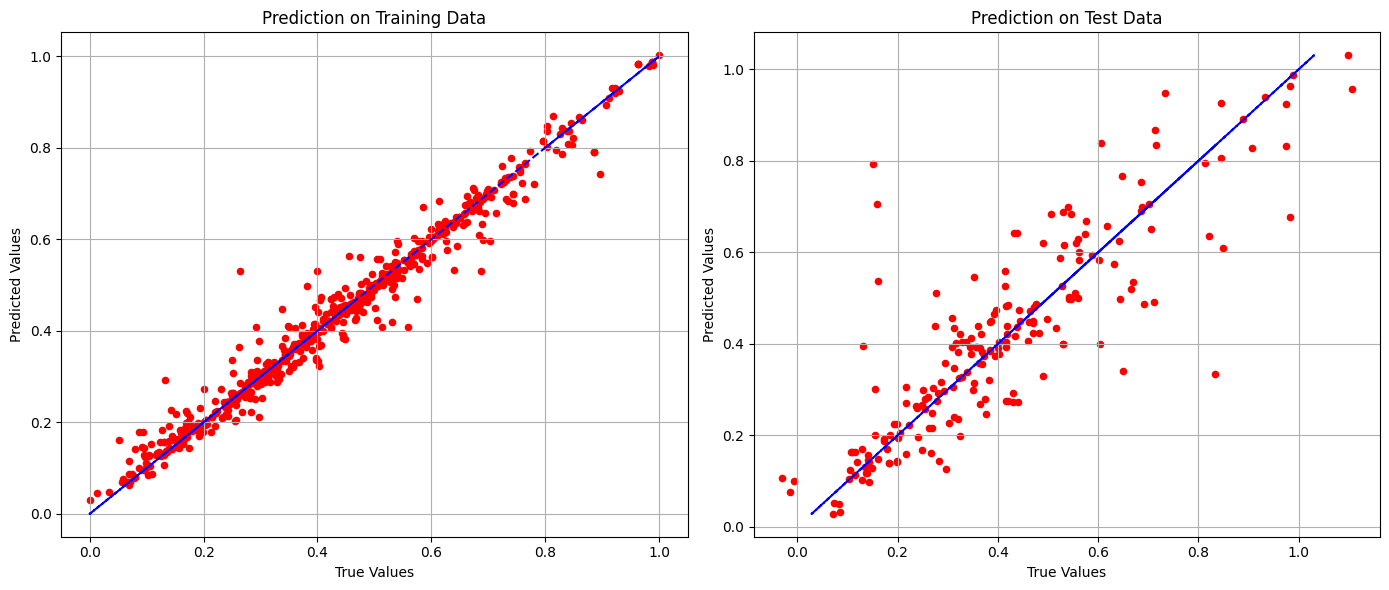

In [188]:
plt.figure(figsize=(14, 6))

# Plot sui dati di addestramento
plt.subplot(1, 2, 1)
plt.scatter(y_train_scaled, y_pred_train, c='r', s=20, label='Error on training data')
plt.plot(y_train_scaled, y_train_scaled, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Training Data')
plt.grid(True)

# Plot sui dati di test
plt.subplot(1, 2, 2)
plt.scatter(y_pred_val, y_val_scaled, c='r', s=20, label='Error on test data')
plt.plot(y_val_scaled, y_val_scaled, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()

# Palese overfitting bro

In [183]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern

# Read and preprocess data
concrete_data = pd.read_csv("/Users/39324/Desktop/ML_project/Dataset.csv")
concrete_data = concrete_data.rename(columns={'blast_furnace_slag': 'slag', 'concrete_compressive_strength': 'strength'})

X = concrete_data.drop(columns=['strength'])
y = concrete_data['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_test_scaled = scaler.transform(y_test_reshaped)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns).astype('float64')
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns).astype('float64')

# MultiKernelGP class
class MultiKernelGP:
    def __init__(self, kernels, kernel_params):
        self.kernels = kernels
        self.kernel_params = kernel_params
        self.num_kernels = len(kernels)

    def kernel(self, X1, X2):
        return sum(param * kernel(X1, X2) for kernel, param in zip(self.kernels, self.kernel_params))

# Define negative log-likelihood function
def negative_log_likelihood(params, X, y, gp, l1_penalty):
    kernel_params = params[:gp.num_kernels]
    sigma_n = params[gp.num_kernels]
    gp.kernel_params = np.abs(kernel_params)

    l1_norm = l1_penalty * np.sum(np.abs(kernel_params))

    K = gp.kernel(X, X) + sigma_n**2 * np.eye(len(X))
    if not np.all(np.isfinite(K)):
        raise ValueError("Kernel matrix K contains non-finite values.")
    L = np.linalg.cholesky(K)
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y))

    log_likelihood = -0.5 * np.dot(y.T, alpha) - np.sum(np.log(np.diag(L))) - 0.5 * len(X) * np.log(2*np.pi)
    log_likelihood -= l1_norm

    return -log_likelihood

# Function to perform k-fold cross-validation
def cross_validate_l1_penalty(X_train, y_train, gp, l1_penalties, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    best_mse = np.inf
    best_l1_penalty = None

    for l1_penalty in l1_penalties:
        fold_mse_sum = 0.0

        for train_idx, val_idx in kf.split(X_train):
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # Initialize Gaussian Process Regressor for this fold
            result = minimize(negative_log_likelihood, initial_params, args=(X_fold_train, y_fold_train, gp, l1_penalty))
            best_params = result.x
            best_kernel_params = best_params[:gp.num_kernels]
            best_sigma_n = best_params[gp.num_kernels]

            gp.kernel_params = np.abs(best_kernel_params)
            gp.sigma_n = best_sigma_n

            kernel_train = gp.kernel(X_fold_train, X_fold_train) + best_sigma_n**2 * np.eye(len(X_fold_train))
            gp_reg = GaussianProcessRegressor(kernel=None, alpha=best_sigma_n**2, random_state=42)
            gp_reg.fit(kernel_train, y_fold_train.ravel())

            kernel_val = gp.kernel(X_fold_val, X_fold_train)
            y_pred_val, _ = gp_reg.predict(kernel_val, return_std=True)
            y_pred_val = y_pred_val.reshape(-1, 1)

            mse_val = mean_squared_error(y_fold_val, y_pred_val)
            fold_mse_sum += mse_val

        avg_mse = fold_mse_sum / num_folds

        if avg_mse < best_mse:
            best_mse = avg_mse
            best_l1_penalty = l1_penalty

    return best_l1_penalty, best_mse

# Initialize MultiKernelGP instance
kernels = [RBF(length_scale=1.0), WhiteKernel(noise_level=1.0), Matern(length_scale=1.0)]
initial_kernel_params = [1.0, 1.0, 1.0]  # Initial values for kernel parameters
gp = MultiKernelGP(kernels, initial_kernel_params)

# Initial parameters for optimization (kernel_params + sigma_n)
initial_params = np.hstack([initial_kernel_params, 1.0])

# Specify range of l1 penalties to test
l1_penalties = [10.0,30,50,100,1000]  # Adjust as needed

# Perform cross-validation to find the best l1_penalty
best_l1_penalty, best_mse = cross_validate_l1_penalty(X_train_scaled_df.values, y_train_scaled.ravel(), gp, l1_penalties)

print("Best L1 Penalty:", best_l1_penalty)
print("Best MSE:", best_mse)


Best L1 Penalty: 30
Best MSE: 0.007138682139617267


# Trovato \lambda = 30

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern

# Read and preprocess data
concrete_data = pd.read_csv("/Users/39324/Desktop/ML_project/Dataset.csv")
concrete_data = concrete_data.rename(columns={'blast_furnace_slag': 'slag', 'concrete_compressive_strength': 'strength'})

X = concrete_data.drop(columns=['strength'])
y = concrete_data['strength']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_val_reshaped = y_val.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_val_scaled = scaler.transform(y_val_reshaped)
y_test_scaled = scaler.transform(y_test_reshaped)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns).astype('float64')
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X.columns).astype('float64')
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns).astype('float64')

# MultiKernelGP class
class MultiKernelGP:
    def __init__(self, kernels, kernel_params):
        self.kernels = kernels
        self.kernel_params = kernel_params
        self.num_kernels = len(kernels)

    def kernel(self, X1, X2):
        return sum(param * kernel(X1, X2) for kernel, param in zip(self.kernels, self.kernel_params))

# Define negative log-likelihood function
def negative_log_likelihood(params, X, y, gp, l1_penalty):
    kernel_params = params[:gp.num_kernels]
    sigma_n = params[gp.num_kernels]
    gp.kernel_params = np.abs(kernel_params)

    l1_norm = l1_penalty * np.sum(np.abs(kernel_params))

    K = gp.kernel(X, X) + sigma_n**2 * np.eye(len(X))
    if not np.all(np.isfinite(K)):
        raise ValueError("Kernel matrix K contains non-finite values.")
    L = np.linalg.cholesky(K)
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y))

    log_likelihood = -0.5 * np.dot(y.T, alpha) - np.sum(np.log(np.diag(L))) - 0.5 * len(X) * np.log(2*np.pi)
    log_likelihood -= l1_norm

    return -log_likelihood

# Initialize MultiKernelGP instance
kernels = [RBF(length_scale=1.0), WhiteKernel(noise_level=1.0), Matern(length_scale=1.0)]
initial_kernel_params = [1.0, 1.0, 1.0]  # Initial values for kernel parameters
gp = MultiKernelGP(kernels, initial_kernel_params)

# Initial parameters for optimization (kernel_params + sigma_n)
initial_params = np.hstack([initial_kernel_params, 1.0])

# Optimization using minimize function
l1_penalty = 30  # Example value for L1 penalty (adjust as needed)
result = minimize(negative_log_likelihood, initial_params, args=(X_train_scaled_df.values, y_train_scaled, gp, l1_penalty))

# Retrieve optimized parameters
best_params = result.x
best_kernel_params = best_params[:gp.num_kernels]
best_sigma_n = best_params[gp.num_kernels]

# Update kernel parameters and noise parameter in gp instance
gp.kernel_params = np.abs(best_kernel_params)
gp.sigma_n = best_sigma_n

# Calculate kernel matrix for training data
kernel_train = gp.kernel(X_train_scaled_df.values, X_train_scaled_df.values) + best_sigma_n**2 * np.eye(len(X_train_scaled_df))

# Initialize Gaussian Process Regressor without specifying kernel
gp_reg = GaussianProcessRegressor(kernel=None, alpha=best_sigma_n**2, random_state=42)

# Fit the GP regressor to training data using kernel matrix
gp_reg.fit(kernel_train, y_train_scaled.ravel())  # Use .ravel() to convert to 1D array

# Predict on training, validation, and test data
kernel_train_pred = gp.kernel(X_train_scaled_df.values, X_train_scaled_df.values)
y_pred_train = gp_reg.predict(kernel_train_pred)

kernel_val = gp.kernel(X_val_scaled_df.values, X_train_scaled_df.values)
y_pred_val = gp_reg.predict(kernel_val)

kernel_test = gp.kernel(X_test_scaled_df.values, X_train_scaled_df.values)
y_pred_test = gp_reg.predict(kernel_test)

# Calculate R-squared (R^2) for training, validation, and test sets
r2_train = r2_score(y_train_scaled, y_pred_train)
r2_val = r2_score(y_val_scaled, y_pred_val)

print("Best kernel parameters:", best_kernel_params)
print("Best noise parameter sigma_n:", best_sigma_n)
print("R-squared (R^2) on training set:", r2_train)
print("R-squared (R^2) on validation set:", r2_val)


Best kernel parameters: [ 1.22981261e-01 -2.32286983e-09 -1.43479084e-01]
Best noise parameter sigma_n: 0.05953486384706066
R-squared (R^2) on training set: 0.9116407513326859
R-squared (R^2) on validation set: 0.8327694796738119


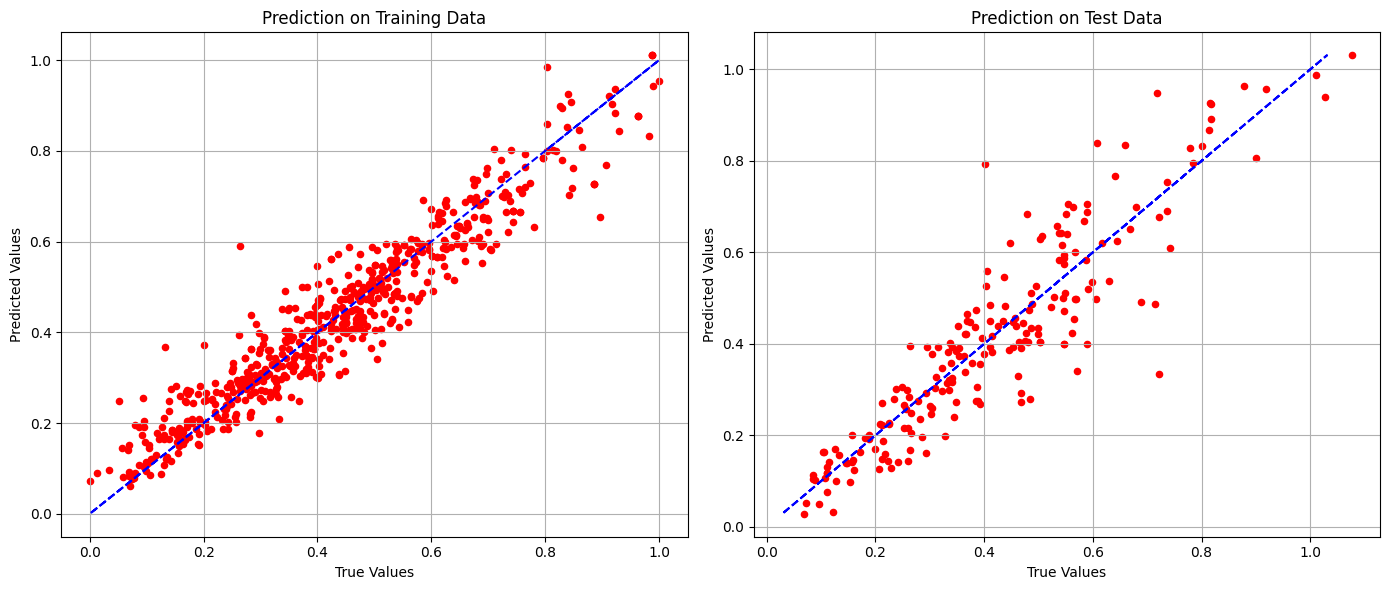

In [3]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot sui dati di addestramento
plt.subplot(1, 2, 1)
plt.scatter(y_train_scaled, y_pred_train, c='r', s=20, label='Error on training data')
plt.plot(y_train_scaled, y_train_scaled, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Training Data')
plt.grid(True)

# Plot sui dati di test
plt.subplot(1, 2, 2)
plt.scatter(y_pred_val, y_val_scaled, c='r', s=20, label='Error on test data')
plt.plot(y_val_scaled, y_val_scaled, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\39324\AppData\Local\Temp\ipykernel_8140\47723060.py:8: RuntimeWarning: divide by zero encountered in divide
  mape_train_RBF = np.mean(np.abs((y_train_scaled - y_pred_train) / y_train_scaled)) * 100


RMSE - Training data: 0.06
RMSE - Test data: 0.09
MAPE - Training data: inf%
MAPE - Test data: 85.93%
R^2 - Training data: 0.91
R^2 - Test data: 0.82


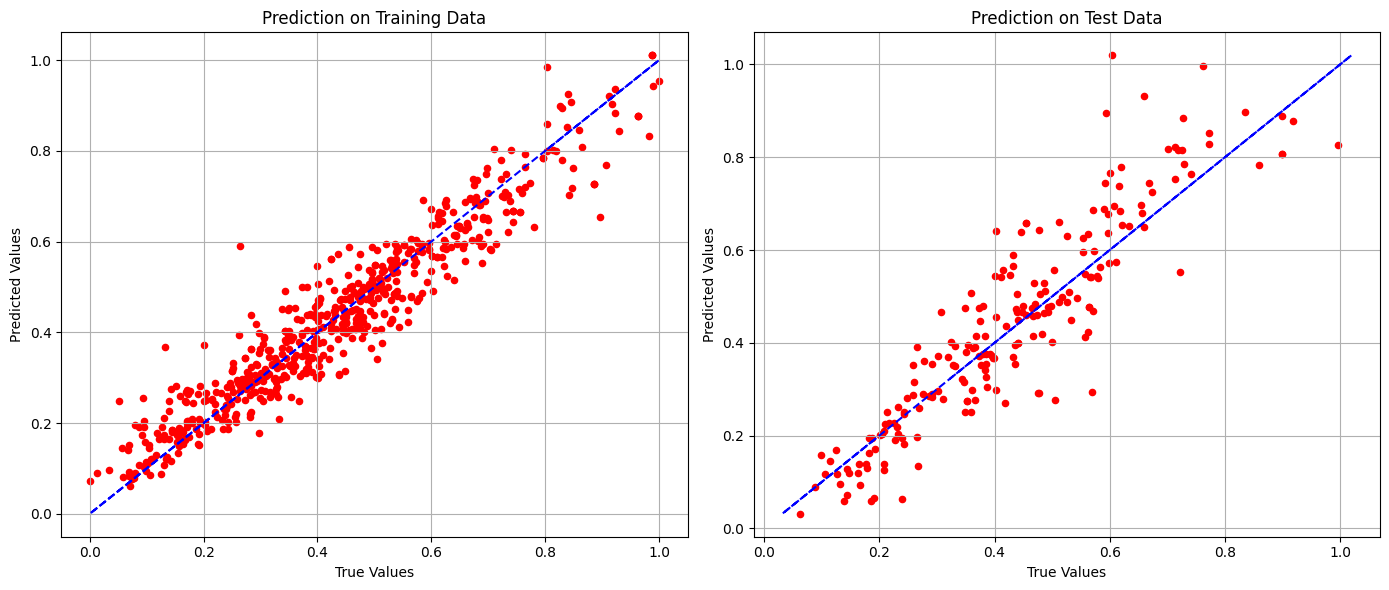

In [5]:

import matplotlib.pyplot as plt
r2_train = r2_score(y_test_scaled, y_pred_test)
r2_val = r2_score(y_test_scaled, y_pred_test)

rmse_train_RBF = np.sqrt(mean_squared_error(y_train_scaled, y_pred_train))
rmse_test_RBF = np.sqrt(mean_squared_error(y_test_scaled, y_pred_test))

mape_train_RBF = np.mean(np.abs((y_train_scaled - y_pred_train) / y_train_scaled)) * 100
mape_test_RBF = np.mean(np.abs((y_test_scaled - y_pred_test) / y_test_scaled)) * 100

r2_train_RBF = r2_score(y_train_scaled, y_pred_train)
r2_test_RBF = r2_score(y_test_scaled, y_pred_test)


print(f"RMSE - Training data: {rmse_train_RBF:.2f}")
print(f"RMSE - Test data: {rmse_test_RBF:.2f}")
print(f"MAPE - Training data: {mape_train_RBF:.2f}%")
print(f"MAPE - Test data: {mape_test_RBF:.2f}%")
print(f"R^2 - Training data: {r2_train_RBF:.2f}")
print(f"R^2 - Test data: {r2_test_RBF:.2f}")


plt.figure(figsize=(14, 6))

# Plot sui dati di addestramento
plt.subplot(1, 2, 1)
plt.scatter(y_train_scaled, y_pred_train, c='r', s=20, label='Error on training data')
plt.plot(y_train_scaled, y_train_scaled, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Training Data')
plt.grid(True)

# Plot sui dati di test
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, y_test_scaled, c='r', s=20, label='Error on test data')
plt.plot(y_test_scaled, y_test_scaled, 'b--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction on Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()